In [42]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
import urllib
from urllib.request import *

In [45]:
#Download random color images
def getImages(h,w,num_pics): 
    url = "https://picsum.photos/"+str(h)+"/"+str(w)+"/?random"
    for i in range(num_pics):
        urllib.request.urlretrieve(url, "images/"+str(i)+".jpg")
getImages(400,400,100)

https://picsum.photos/400/400/?random


In [70]:
#Preprocess our images 
data_X = []
data_Y = []
for i in range(100): 
    img_path = 'images/'+str(i)+'.jpg'
    image = img_to_array(load_img(img_path))
    image = np.array(image, dtype=float)
    X = rgb2lab(1.0/255*image)[:,:,0]
    Y = rgb2lab(1.0/255*image)[:,:,1:]
    Y = Y / 128
    X = X.reshape(400, 400, 1)
    Y = Y.reshape(400, 400, 2)
    data_X.append(X)
    data_Y.append(Y)

In [66]:
#Build Model
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.compile(optimizer='rmsprop',loss='mse')

In [91]:
#Train Model 
model.fit(x=np.array(data_X), y=np.array(data_Y), batch_size=20, epochs=20)

Epoch 1/20
100/100 [==============================] - 39s - loss: 0.0087     
Epoch 2/20
100/100 [==============================] - 36s - loss: 0.0087     
Epoch 3/20
100/100 [==============================] - 37s - loss: 0.0090     

In [85]:
#A random gray image to test the model
h = 400 
w = 400 
url = "https://picsum.photos/g/"+str(h)+"/"+str(w)+"/?random"
urllib.request.urlretrieve(url, "gray_test_image.jpg")
image = img_to_array(load_img("gray_test_image.jpg"))
image = np.array(image, dtype=float)
test_X = rgb2lab(1.0/255*image)[:,:,0]
test_X = test_X.reshape(1,400, 400, 1)

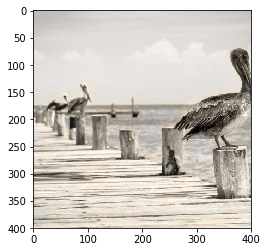

/Users/Adamlieberman/anaconda/envs/cse6240hw1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [92]:
# Output colorizations
output = model.predict(test_X)
output = output * 128
cur = np.zeros((400, 400, 3))
cur[:,:,0] = test_X[0][:,:,0]
cur[:,:,1:] = output[0]
plt.imshow(lab2rgb(cur))
plt.show()
imsave("colored_image.png", lab2rgb(cur))
#imsave("img_gray_version.png", rgb2gray(lab2rgb(cur)))